# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [20]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
ideb = pd.read_csv('/content/drive/MyDrive/Sirius/Atividades_semana2/ideb.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
ideb

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,0,2005,AC,1200054,municipal,fundamental,iniciais (1-5),64.1,0.645727,161.80,150.80,3.794003,2.4,NaN
1,1,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.80,165.60,4.177761,2.3,NaN
2,2,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.80,149.60,3.578558,1.8,NaN
3,3,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.60,155.80,3.920963,1.9,NaN
4,4,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.00,153.39,3.785995,1.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130189,130189,2019,SP,3553104,publica,fundamental,iniciais (1-5),97.1,0.970312,253.44,225.44,6.899785,6.7,6.4
130190,130190,2019,SP,3553856,municipal,fundamental,iniciais (1-5),97.4,0.972469,246.38,231.63,6.877598,6.7,8.1
130191,130191,2019,SP,3553856,publica,fundamental,iniciais (1-5),97.4,0.972469,246.38,231.63,6.877598,6.7,8.1
130192,130192,2019,SP,3557006,municipal,fundamental,iniciais (1-5),99.6,0.995792,245.08,227.11,6.770607,6.7,6.8


In [22]:
df = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
df

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [24]:
# Verificando o número de linhas e colunas do DataFrame.
num_linhas, num_colunas = df.shape
print(f'O DataFrame possui {num_linhas} linhas e {num_colunas} colunas.')

# Verificando se há dados faltantes no DataFrame
dados_faltantes = df.isnull().sum()
print('\nQuantidade de dados faltantes por coluna:')
print(dados_faltantes)

O DataFrame possui 130194 linhas e 6 colunas.

Quantidade de dados faltantes por coluna:
ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64


In [25]:
# Removendo linhas com dados faltantes, se houver
novo_df_sem_faltantes = df.dropna()

# Verificando o número de linhas e colunas após a remoção
num_linhas_sem_faltantes, num_colunas_sem_faltantes = novo_df_sem_faltantes.shape
print(f'\nApós a remoção de linhas com dados faltantes, o DataFrame possui {num_linhas_sem_faltantes} linhas e {num_colunas_sem_faltantes} colunas.')


Após a remoção de linhas com dados faltantes, o DataFrame possui 88321 linhas e 6 colunas.


In [26]:
novo_df_sem_faltantes

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [27]:
import pandas as pd
from scipy import stats

# Criando um DataFrame somente com os valores da taxa de aprovação para o ano de 2005
taxa_aprovacao_2005 = novo_df_sem_faltantes[novo_df_sem_faltantes['ano'] == 2005]['taxa_aprovacao']

# declarando variáveis para  teste de hipótese
hipotese_nula = 78  # Hipótese nula: a média é igual a 78
nivel_confianca = 0.95

t_statistic, p_valor = stats.ttest_1samp(taxa_aprovacao_2005, hipotese_nula)

# Testando o resultado do teste de hipótese
if p_valor < (1 - nivel_confianca):
    resultado = "Rejeitamos a hipótese nula."
else:
    resultado = "Não rejeitamos a hipótese nula."



In [28]:
print(f"Resultado do teste de hipótese:")
print(f"Estatística t: {t_statistic}")
print(f"Valor de p: {p_valor}")
print(resultado)

Resultado do teste de hipótese:
Estatística t: 20.890080427394643
Valor de p: 3.1469508067020596e-95
Rejeitamos a hipótese nula.


# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [38]:
import pandas as pd
from scipy import stats

# Crie um DataFrame auxiliar com dados apenas de 2019
ideb_2019 = novo_df_sem_faltantes[novo_df_sem_faltantes['ano'] == 2019]

# Selecionando os valores de IDEB para o Rio Grande do Sul e o Ceará
ideb_rs = ideb_2019[ideb_2019['sigla_uf'] == 'RS']['ideb']
ideb_ceara = ideb_2019[ideb_2019['sigla_uf'] == 'CE']['ideb']

# Realizando o teste de hipótese para médias independentes
nivel_confianca = 0.95

# Hipótese nula é que as médias são iguais
t_statistic, p_valor = stats.ttest_ind(ideb_rs, ideb_ceara, equal_var=True)

# Testando o resultado do teste de hipótese
if p_valor < (1 - nivel_confianca):
    resultado = "Rejeitamos a hipótese nula."
else:
    resultado = "Não rejeitamos a hipótese nula."

print(f"Resultado do teste de hipótese:")
print(f"Estatística t: {t_statistic}")
print(f"Valor de p: {p_valor}")
print(resultado)


Resultado do teste de hipótese:
Estatística t: -4.3200508719663135
Valor de p: 1.6632800256873896e-05
Rejeitamos a hipótese nula.


### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

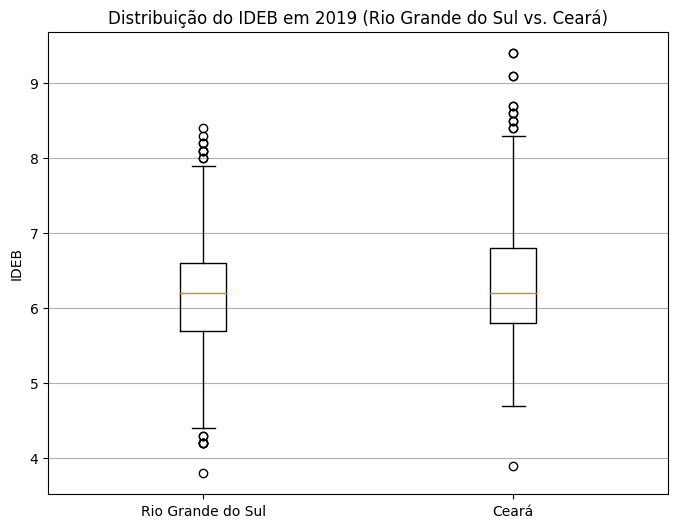

In [39]:
import matplotlib.pyplot as plt

# Criando um DataFrame auxiliar com dados apenas de 2019
ideb_2019 = novo_df_sem_faltantes[novo_df_sem_faltantes['ano'] == 2019]

# Selecionando os valores de IDEB para o Rio Grande do Sul e o Ceará
ideb_rs = ideb_2019[ideb_2019['sigla_uf'] == 'RS']['ideb']
ideb_ceara = ideb_2019[ideb_2019['sigla_uf'] == 'CE']['ideb']

# Criando um boxplot para comparar os dois estados
plt.figure(figsize=(8, 6))
plt.boxplot([ideb_rs, ideb_ceara], labels=['Rio Grande do Sul', 'Ceará'])
plt.title("Distribuição do IDEB em 2019 (Rio Grande do Sul vs. Ceará)")
plt.ylabel("IDEB")
plt.grid(axis='y')
plt.show()

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [42]:
import pandas as pd
from scipy import stats

# Criando dois DataFrames auxiliares com dados de 2005 e 2019
ideb_2005 = novo_df_sem_faltantes[novo_df_sem_faltantes['ano'] == 2005]
ideb_2019 = novo_df_sem_faltantes[novo_df_sem_faltantes['ano'] == 2019]

# Selecionando 300 linhas de cada DataFrame sem valores faltantes
ideb_2005_sample = ideb_2005.dropna().sample(300)
ideb_2019_sample = ideb_2019.dropna().sample(300)

# Realizando o teste de hipótese para médias independentes
nivel_confianca = 0.95

# Hipótese nula é que as médias são iguais
t_statistic, p_valor = stats.ttest_ind(ideb_2005_sample['ideb'], ideb_2019_sample['ideb'], equal_var=True)

# Descrevendo o resultado do teste de hipótese
if p_valor < (1 - nivel_confianca):
    resultado = "Rejeitamos a hipótese nula."
else:
    resultado = "Não rejeitamos a hipótese nula."

print(f"Resultado do teste de hipótese:")
print(f"Estatística t: {t_statistic}")
print(f"Valor de p: {p_valor}")
print(resultado)


Resultado do teste de hipótese:
Estatística t: -28.66323955188907
Valor de p: 2.3408344618136946e-114
Rejeitamos a hipótese nula.


### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

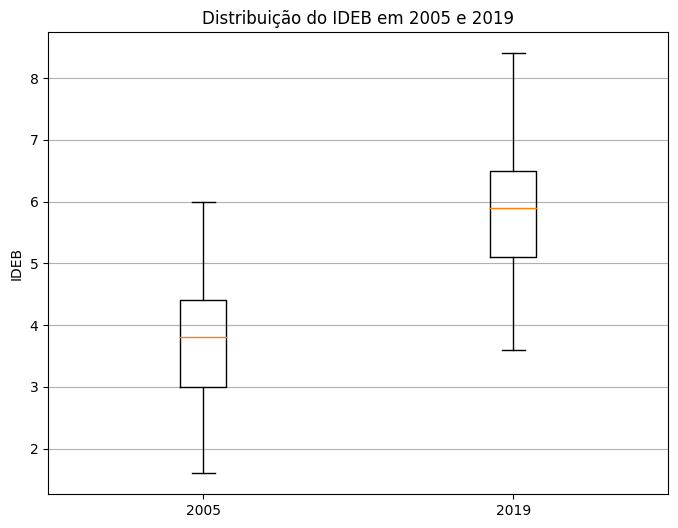

In [43]:
import matplotlib.pyplot as plt

# Selecionando 300 linhas de cada DataFrame sem valores faltantes
ideb_2005_sample = ideb_2005.dropna().sample(300)
ideb_2019_sample = ideb_2019.dropna().sample(300)

# Criando um boxplot para comparar os dois anos
plt.figure(figsize=(8, 6))
plt.boxplot([ideb_2005_sample['ideb'], ideb_2019_sample['ideb']], labels=['2005', '2019'])
plt.title("Distribuição do IDEB em 2005 e 2019")
plt.ylabel("IDEB")
plt.grid(axis='y')
plt.show()


# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [33]:
import pandas as pd
from scipy.stats import f_oneway

# Criando três DataFrames auxiliares, um para cada estado da região sul em 2019
ideb_rs = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'] == 'RS')]['ideb']
ideb_sc = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'] == 'SC')]['ideb']
ideb_pr = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'] == 'PR')]['ideb']

# Realizando o teste ANOVA One-Way
nivel_confianca = 0.95

# Realizando o teste ANOVA
#Hipótese nula é que as médias são iguais
f_statistic, p_valor = f_oneway(ideb_rs, ideb_sc, ideb_pr)

# testando o resultado do teste ANOVA
if p_valor < (1 - nivel_confianca):
    resultado = "Rejeitamos a hipótese nula."
else:
    resultado = "Não rejeitamos a hipótese nula."

print(f"Resultado do teste ANOVA One-Way:")
print(f"Estatística F: {f_statistic}")
print(f"Valor de p: {p_valor}")
print(resultado)


Resultado do teste ANOVA One-Way:
Estatística F: 27.712354138245196
Valor de p: 1.2331589284254783e-12
Rejeitamos a hipótese nula.


In [ ]:
# seu código

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

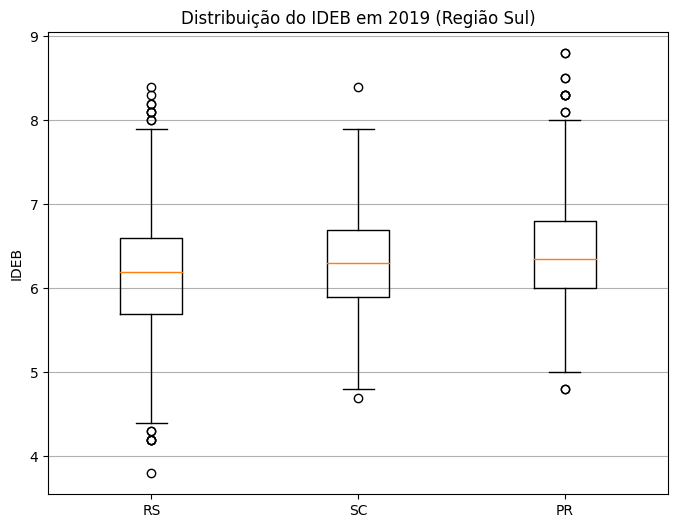

In [34]:
import matplotlib.pyplot as plt

# Selecionando os valores do IDEB para os três estados da região sul em 2019
ideb_rs = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'] == 'RS')]['ideb']
ideb_sc = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'] == 'SC')]['ideb']
ideb_pr = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'] == 'PR')]['ideb']

# Criando um boxplot para comparar os três estados
plt.figure(figsize=(8, 6))
plt.boxplot([ideb_rs, ideb_sc, ideb_pr], labels=['RS', 'SC', 'PR'])
plt.title("Distribuição do IDEB em 2019 (Região Sul)")
plt.ylabel("IDEB")
plt.grid(axis='y')
plt.show()


### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [35]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Criando um DataFrame com os dados de IDEB para os três estados da região sul em 2019
ideb_sul_2019 = novo_df_sem_faltantes[(novo_df_sem_faltantes['ano'] == 2019) & (novo_df_sem_faltantes['sigla_uf'].isin(['RS', 'SC', 'PR']))]

# Realizando o teste de Tukey para comparar as médias entre os estados
tukey_result = pairwise_tukeyhsd(ideb_sul_2019['ideb'], ideb_sul_2019['sigla_uf'])

# Exibindo o resumo do teste de Tukey
print(tukey_result.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------
